In [9]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

service = Service(executable_path='chromedriver_win32/chromedriver.exe')
driver = webdriver.Chrome(service=service)


years = list(range(1977,2023))

url_s = " https://www.basketball-reference.com/leagues/NBA_{}_per_game.html "
for year in years:
    url = url_s.format(year)

    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    with open("players/{}.html".format(year),"w+",encoding="utf-8") as f:
            f.write(driver.page_source)

In [12]:
### Parsing using BeautifulSoup
from bs4 import BeautifulSoup
dfs = []
for year in years:
    with open("players/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="per_game_stats")[0]
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    dfs.append(player_df)


In [13]:
players = pd.concat(dfs)

In [14]:
players.to_csv("players.csv")

In [4]:
import requests
service = Service(executable_path='chromedriver_win32/chromedriver.exe')
driver = webdriver.Chrome(service=service)
years = list(range(1977,2023))

team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"
driver = webdriver.Chrome(service=service)
for year in years:
    url = team_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    with open("teams/{}.html".format(year),"w+",encoding="utf-8") as f:
            f.write(driver.page_source)

In [5]:
dfs = []
for year in years:
    with open("teams/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"]
    dfs.append(w_df)

In [7]:
teams = pd.concat(dfs)

teams.to_csv("teams.csv")

In [1]:
import pandas as pd 


mvps = pd.read_csv("mvp_1976on.csv")

In [2]:
mvps = mvps[["Player","Year","Pts Won","Pts Max","Share"]]

mvps

,Player,Year,Pts Won,Pts Max,Share
0,Kareem Abdul-Jabbar,1977,159.0,247,0.644
1,Bill Walton,1977,29.0,247,0.117
2,Pete Maravich,1977,15.0,247,0.061
3,Bob Lanier,1977,11.0,247,0.045
4,Julius Erving,1977,7.0,247,0.028
...,...,...,...,...,...
730,Stephen Curry,2022,4.0,1000,0.004
731,Chris Paul,2022,2.0,1000,0.002
732,DeMar DeRozan,2022,1.0,1000,0.001
733,Kevin Durant,2022,1.0,1000,0.001


In [3]:
players = pd.read_csv("players.csv")

players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Zaid Abdul-Aziz,C,30,BUF,22,NaN,8.9,1.1,...,1.9,2.2,4.1,0.3,0.1,0.4,NaN,1.0,3.8,1977
1,1,2,Kareem Abdul-Jabbar*,C,29,LAL,82,NaN,36.8,10.8,...,3.2,10.0,13.3,3.9,1.2,3.2,NaN,3.2,26.2,1977
2,2,3,Tom Abernethy,SF,22,LAL,70,NaN,19.7,2.4,...,1.6,2.5,4.2,1.4,0.7,0.1,NaN,1.7,6.3,1977
3,3,4,Alvan Adams,C,22,PHO,72,NaN,31.6,7.3,...,2.5,6.6,9.1,4.5,1.3,1.2,NaN,3.6,18.0,1977
4,4,5,Don Adams,SF,29,BUF,77,NaN,22.2,2.8,...,1.7,3.1,4.8,1.9,1.0,0.2,NaN,2.6,7.3,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
24425,837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
24426,838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
24427,839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [4]:
del players["Unnamed: 0"]
del players["Rk"]

In [5]:
players


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Zaid Abdul-Aziz,C,30,BUF,22,NaN,8.9,1.1,3.4,.338,...,1.9,2.2,4.1,0.3,0.1,0.4,NaN,1.0,3.8,1977
1,Kareem Abdul-Jabbar*,C,29,LAL,82,NaN,36.8,10.8,18.7,.579,...,3.2,10.0,13.3,3.9,1.2,3.2,NaN,3.2,26.2,1977
2,Tom Abernethy,SF,22,LAL,70,NaN,19.7,2.4,5.0,.484,...,1.6,2.5,4.2,1.4,0.7,0.1,NaN,1.7,6.3,1977
3,Alvan Adams,C,22,PHO,72,NaN,31.6,7.3,15.3,.474,...,2.5,6.6,9.1,4.5,1.3,1.2,NaN,3.6,18.0,1977
4,Don Adams,SF,29,BUF,77,NaN,22.2,2.8,6.8,.411,...,1.7,3.1,4.8,1.9,1.0,0.2,NaN,2.6,7.3,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
24425,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
24426,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
24427,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [6]:
players["Player"] = players["Player"].str.replace("*","", regex=False)

In [7]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_team)

In [8]:

players.index = players.index.droplevel()

In [9]:

players.index = players.index.droplevel()

In [10]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
3501,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986
3900,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987
4302,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988
4751,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989
5213,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990


In [11]:

combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [12]:

combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
165,Adrian Dantley,SF,25,UTA,80,NaN,42.7,11.4,20.3,.559,...,4.0,1.4,0.2,3.5,3.1,30.7,1981,15.0,690.0,0.022
166,Adrian Dantley,SF,26,UTA,81,81,39.8,11.2,19.6,.570,...,4.0,1.2,0.2,3.7,3.1,30.3,1982,7.0,690.0,0.010
168,Adrian Dantley,SF,28,UTA,79,79,37.8,10.2,18.2,.558,...,3.9,0.8,0.1,3.3,2.5,30.6,1984,88.0,760.0,0.116
170,Adrian Dantley,SF,30,UTA,76,75,36.1,10.8,19.1,.563,...,3.5,0.8,0.1,3.0,2.7,29.8,1986,2.0,780.0,0.003
172,Adrian Dantley,SF,32,DET,69,50,31.1,6.4,12.5,.514,...,2.5,0.6,0.1,2.0,2.1,20.0,1988,1.0,800.0,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18912,World B. Free,SG,30,CLE,75,71,31.7,8.3,18.8,.445,...,3.0,1.3,0.1,2.1,2.9,22.3,1984,1.0,760.0,0.001
18913,World B. Free,SG,31,CLE,71,50,31.7,8.6,18.7,.459,...,4.5,1.1,0.2,2.0,2.3,22.5,1985,2.0,780.0,0.003
18949,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001
18954,Yao Ming,C,28,HOU,77,77,33.6,7.4,13.4,.548,...,1.8,0.4,1.9,3.0,3.3,19.7,2009,1.0,1210.0,0.001


In [13]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [14]:

teams = pd.read_csv("teams.csv")

In [15]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,50,32,.610,—,110.2,106.2,3.78,1977,Philadelphia 76ers*
1,1,44,38,.537,6.0,104.5,106.5,-1.90,1977,Boston Celtics*
2,2,40,42,.488,10.0,108.6,108.6,0.01,1977,New York Knicks
3,3,30,52,.366,20.0,105.0,109.5,-4.28,1977,Buffalo Braves
4,4,22,60,.268,28.0,95.9,102.7,-6.54,1977,New York Nets
...,...,...,...,...,...,...,...,...,...,...
1429,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
1430,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
1431,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
1432,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [16]:

teams = teams[~teams["W"].str.contains("Division")].copy()

In [17]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [18]:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Buffalo Braves',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Kansas City Kings',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Jazz',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'New York Nets',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'San Diego Clippers',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [24]:
shortnames = {}
with open("shortnames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        shortnames[abbrev] = name

In [25]:
combined["Team"] = combined["Tm"].map(shortnames)

In [26]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.000,Los Angeles Lakers
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.000,Los Angeles Lakers
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.000,Los Angeles Lakers
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.000,Los Angeles Lakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.000,Detroit Pistons
19099,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.000,Atlanta Hawks
19100,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.000,Los Angeles Clippers
19101,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.2,0.7,0.8,2.0,4.7,2006,0.0,0.0,0.000,Los Angeles Clippers


In [27]:
stats = combined.merge(teams, how="outer",on=["Team", "Year"])

In [28]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.000,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,.513,...,0.000,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,.579,...,0.009,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,.667,...,0.000,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,.564,...,0.173,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Kansas City Kings,3.0,45,37,.549,8.0,113.8,112.3,1.04
19120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,San Diego Clippers,13.0,25,57,.305,33.0,108.6,113.4,-4.61
19121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Kansas City Kings,4.0,38,44,.463,7.0,110.0,111.5,-1.62
19122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,San Diego Clippers,13.0,30,52,.366,24.0,110.7,114.0,-3.21


In [30]:
del stats["Unnamed: 0"]

In [32]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [34]:
stats = stats.apply(pd.to_numeric, errors='ignore')

In [36]:
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [37]:
stats["GB"].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', nan, '50.0', '10.0',
       '30.0', '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0',
       '39.0', '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0',
       '27.0', '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5',
       '11.5', '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0',
       '32.5', '4.5'], dtype=object)

In [39]:
stats["GB"] = pd.to_numeric(stats["GB"].str.replace("—","0"))

In [41]:
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [42]:
stats.to_csv("player_mvp_stats.csv")

In [55]:
highest_scoring = stats[stats["G"] > 70].sort_values("3P", ascending=False).head(10)

<Axes: xlabel='Player'>

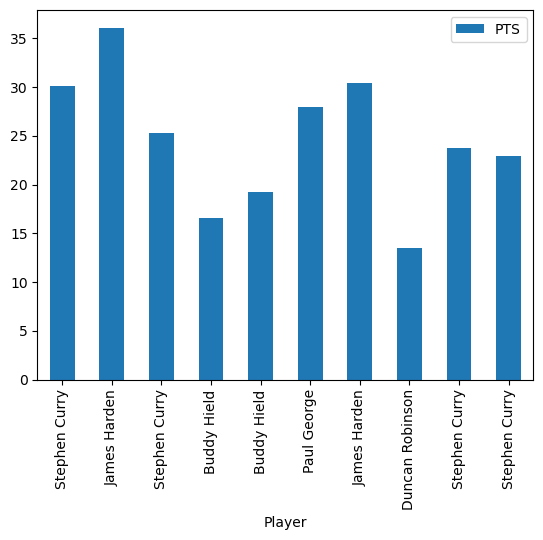

In [56]:

highest_scoring.plot.bar("Player", "PTS")

In [57]:
highest_scoring_by_year = stats.groupby("Year").apply(lambda x: x.sort_values("3P", ascending=False).head(1))

In [59]:
highest_scoring_by_year

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1977,1008,Aaron James,SF,24.0,NOJ,52.0,NaN,20.4,4.6,9.3,0.490,...,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,1060,Aaron James,SF,25.0,NOJ,80.0,NaN,26.5,5.4,10.8,0.497,...,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,1100,Aaron James,SF,26.0,NOJ,73.0,NaN,19.4,4.3,8.6,0.494,...,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,13898,Brian Taylor,PG,28.0,SDC,78.0,NaN,35.3,5.4,11.5,0.467,...,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,13440,Joe Hassett,SG,25.0,GSW,41.0,NaN,17.4,3.5,8.3,0.421,...,0.0,0.000,Golden State Warriors,39.0,43.0,0.476,18.0,109.8,111.0,-1.41
1982,13453,Joe Hassett,SG,26.0,GSW,68.0,2.0,11.6,2.1,5.6,0.377,...,0.0,0.000,Golden State Warriors,45.0,37.0,0.549,12.0,110.9,109.8,0.80
1983,12059,Mike Dunleavy,PG,28.0,SAS,79.0,9.0,20.5,2.7,6.5,0.418,...,0.0,0.000,San Antonio Spurs,53.0,29.0,0.646,0.0,114.3,110.7,3.10
1984,6371,Mike Dunleavy,PG,29.0,MIL,17.0,12.0,23.8,4.1,7.5,0.551,...,0.0,0.000,Milwaukee Bucks,50.0,32.0,0.610,0.0,105.7,101.5,4.04
1985,2584,Darrell Griffith,SG,26.0,UTA,78.0,78.0,35.6,9.3,20.4,0.457,...,0.0,0.000,Utah Jazz,41.0,41.0,0.500,11.0,109.0,109.1,-0.33


<Axes: xlabel='Year'>

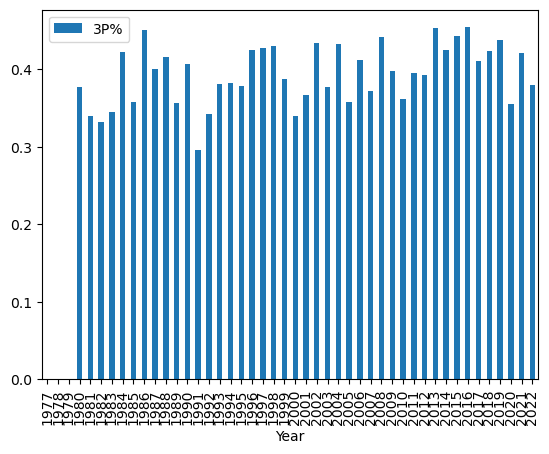

In [58]:
highest_scoring_by_year.plot.bar("Year", "3P%")

In [48]:
stats.groupby("Year").apply(lambda x: x.shape[0])

Year
1977    299
1978    288
1979    281
1980    287
1981    305
1982    314
1983    314
1984    310
1985    316
1986    320
1987    333
1988    330
1989    351
1990    379
1991    385
1992    386
1993    390
1994    403
1995    405
1996    428
1997    441
1998    439
1999    440
2000    439
2001    441
2002    440
2003    428
2004    442
2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2011    452
2012    478
2013    467
2014    480
2015    492
2016    476
2017    486
2018    540
2019    530
2020    529
2021    540
2022    605
dtype: int64

In [49]:
stats.corr()["Share"]

C:\Users\ruwin\AppData\Local\Temp\ipykernel_1084\2927041331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()["Share"]


Age        0.019893
G          0.088753
GS         0.173137
MP         0.168109
FG         0.273066
FGA        0.247620
FG%        0.071623
3P         0.081570
3PA        0.082126
3P%        0.010996
2P         0.267877
2PA        0.243738
2P%        0.068039
eFG%       0.065269
FT         0.316712
FTA        0.316528
FT%        0.045225
ORB        0.121884
DRB        0.220941
TRB        0.197984
AST        0.199846
STL        0.178273
BLK        0.156926
TOV        0.230790
PF         0.072072
PTS        0.287749
Year      -0.009713
Pts Won    0.978644
Pts Max    0.512588
Share      1.000000
W          0.126251
L         -0.125030
W/L%       0.129035
GB        -0.104017
PS/G       0.045273
PA/G      -0.032792
SRS        0.122912
Name: Share, dtype: float64

C:\Users\ruwin\AppData\Local\Temp\ipykernel_1084\197462118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()["Share"].plot.bar()


<Axes: >

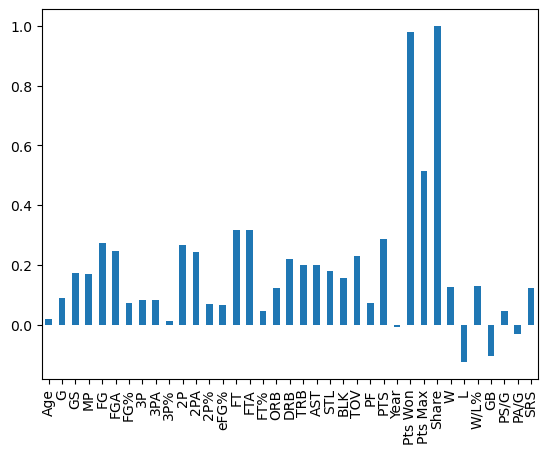

In [50]:
stats.corr()["Share"].plot.bar()